# SLE-GAN
![Sample of images generated by SLE-GAN]

This example demonstrates [SLE-GAN](https://arxiv.org/abs/2101.04775), which learns to generate images from small datasets.

# Preparation
Let's start by installing nnabla and accessing [nnabla-examples repository](https://github.com/sony/nnabla-examples). If you're running on Colab, make sure that your Runtime setting is set as GPU, which can be set up from the top menu (Runtime → change runtime type), and make sure to click **Connect** on the top right-hand side of the screen before you start.

In [1]:
!pip install nnabla-ext-cuda100
!git clone https://github.com/lutherrr/slegan.git
%cd /content/slegan

     |████████████████████████████████| 47.6 MB 54 kB/s 
     |████████████████████████████████| 18.7 MB 20 kB/s 
     |████████████████████████████████| 131 kB 45.0 MB/s 
     |████████████████████████████████| 8.1 MB 38.1 MB/s 
     |████████████████████████████████| 79 kB 7.7 MB/s 
     |████████████████████████████████| 138 kB 48.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.7 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Cloning into 'slegan'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
rem

Now, select a type of object that you want to generate from the drop-down menu.

We have many object categories available ranging from animals to landmark architecutres.

**Make sure to run the cell after making a choice from the drop-down menu.**

Depending on your choice above, the following cell will download the pre-trained weight parameters.

In [2]:
%cd /content/slegan

/content/slegan


In [ ]:
!python train.py --max-iter 8000 --img-path /content/slegan/earth

2021-11-10 23:23:48,746 [nnabla][INFO]: Initializing CPU extension...
2021-11-10 23:23:49,053 [nnabla][INFO]: Arguments are saved to ./result/tmp/Arguments-train.txt.
2021-11-10 23:23:49,053 [nnabla][INFO]: aug_list=['lrflip', 'translation', 'color']
2021-11-10 23:23:49,053 [nnabla][INFO]: batch_size=8
2021-11-10 23:23:49,054 [nnabla][INFO]: context=cudnn
2021-11-10 23:23:49,054 [nnabla][INFO]: device_id=0
2021-11-10 23:23:49,054 [nnabla][INFO]: image_size=256
2021-11-10 23:23:49,054 [nnabla][INFO]: img_path=/content/slegan/earth
2021-11-10 23:23:49,054 [nnabla][INFO]: latent=256
2021-11-10 23:23:49,054 [nnabla][INFO]: lr=0.0002
2021-11-10 23:23:49,054 [nnabla][INFO]: max_iter=8000
2021-11-10 23:23:49,054 [nnabla][INFO]: model_load_path=.
2021-11-10 23:23:49,054 [nnabla][INFO]: monitor_path=./result/tmp
2021-11-10 23:23:49,054 [nnabla][INFO]: save_interval=50000
2021-11-10 23:23:49,054 [nnabla][INFO]: test_interval=5000
2021-11-10 23:23:49,054 [nnabla][INFO]: train_samples=-1
2021-11-1

In [4]:
dataset = "earth1" #@param ["earth1","Grumpy_Cat", "Bridge_of_Sighs", "Medici_Fountain", "Obama", "Panda", "Temple_of_Heaven", "Wuzhen", "Dog"]

In [5]:
if dataset == "earth1":
    path1 = "/content/slegan/earth1/Gen_iter10000.h5"
    path2 = "/content/slegan/earth1/GenEMA_iter100000.h5"


!wget $path1 $path2
!mkdir $dataset
!mv *.h5 $dataset

/content/slegan/earth1/Gen_iter10000.h5: Scheme missing.
/content/slegan/earth1/GenEMA_iter100000.h5: Scheme missing.
mkdir: cannot create directory ‘earth1’: File exists
mv: cannot stat '*.h5': No such file or directory


# Generation

Now, let's generate the images by simply running the following cell! You can change the number of images to generate and the image size to generate by modifying the numbers after `--batch-size` and `--image-size`.

In [10]:
!python generate.py --model-load-path $dataset --batch-size 64 --image-size 256

2021-11-10 23:04:54,039 [nnabla][INFO]: Initializing CPU extension...
2021-11-10 23:04:54,220 [nnabla][INFO]: Arguments are saved to ./result/tmp/Arguments-generate.txt.
2021-11-10 23:04:54,220 [nnabla][INFO]: aug_list=['lrflip', 'translation', 'color']
2021-11-10 23:04:54,220 [nnabla][INFO]: batch_size=64
2021-11-10 23:04:54,220 [nnabla][INFO]: context=cudnn
2021-11-10 23:04:54,221 [nnabla][INFO]: device_id=0
2021-11-10 23:04:54,221 [nnabla][INFO]: image_size=256
2021-11-10 23:04:54,221 [nnabla][INFO]: img_path=~/AnimalFace-dog
2021-11-10 23:04:54,221 [nnabla][INFO]: latent=256
2021-11-10 23:04:54,221 [nnabla][INFO]: lr=0.0002
2021-11-10 23:04:54,221 [nnabla][INFO]: max_iter=100000
2021-11-10 23:04:54,221 [nnabla][INFO]: model_load_path=earth1
2021-11-10 23:04:54,221 [nnabla][INFO]: monitor_path=./result/tmp
2021-11-10 23:04:54,221 [nnabla][INFO]: save_interval=50000
2021-11-10 23:04:54,221 [nnabla][INFO]: test_interval=5000
2021-11-10 23:04:54,221 [nnabla][INFO]: train_samples=-1
202

Images have been generated now. Let's see how they look!

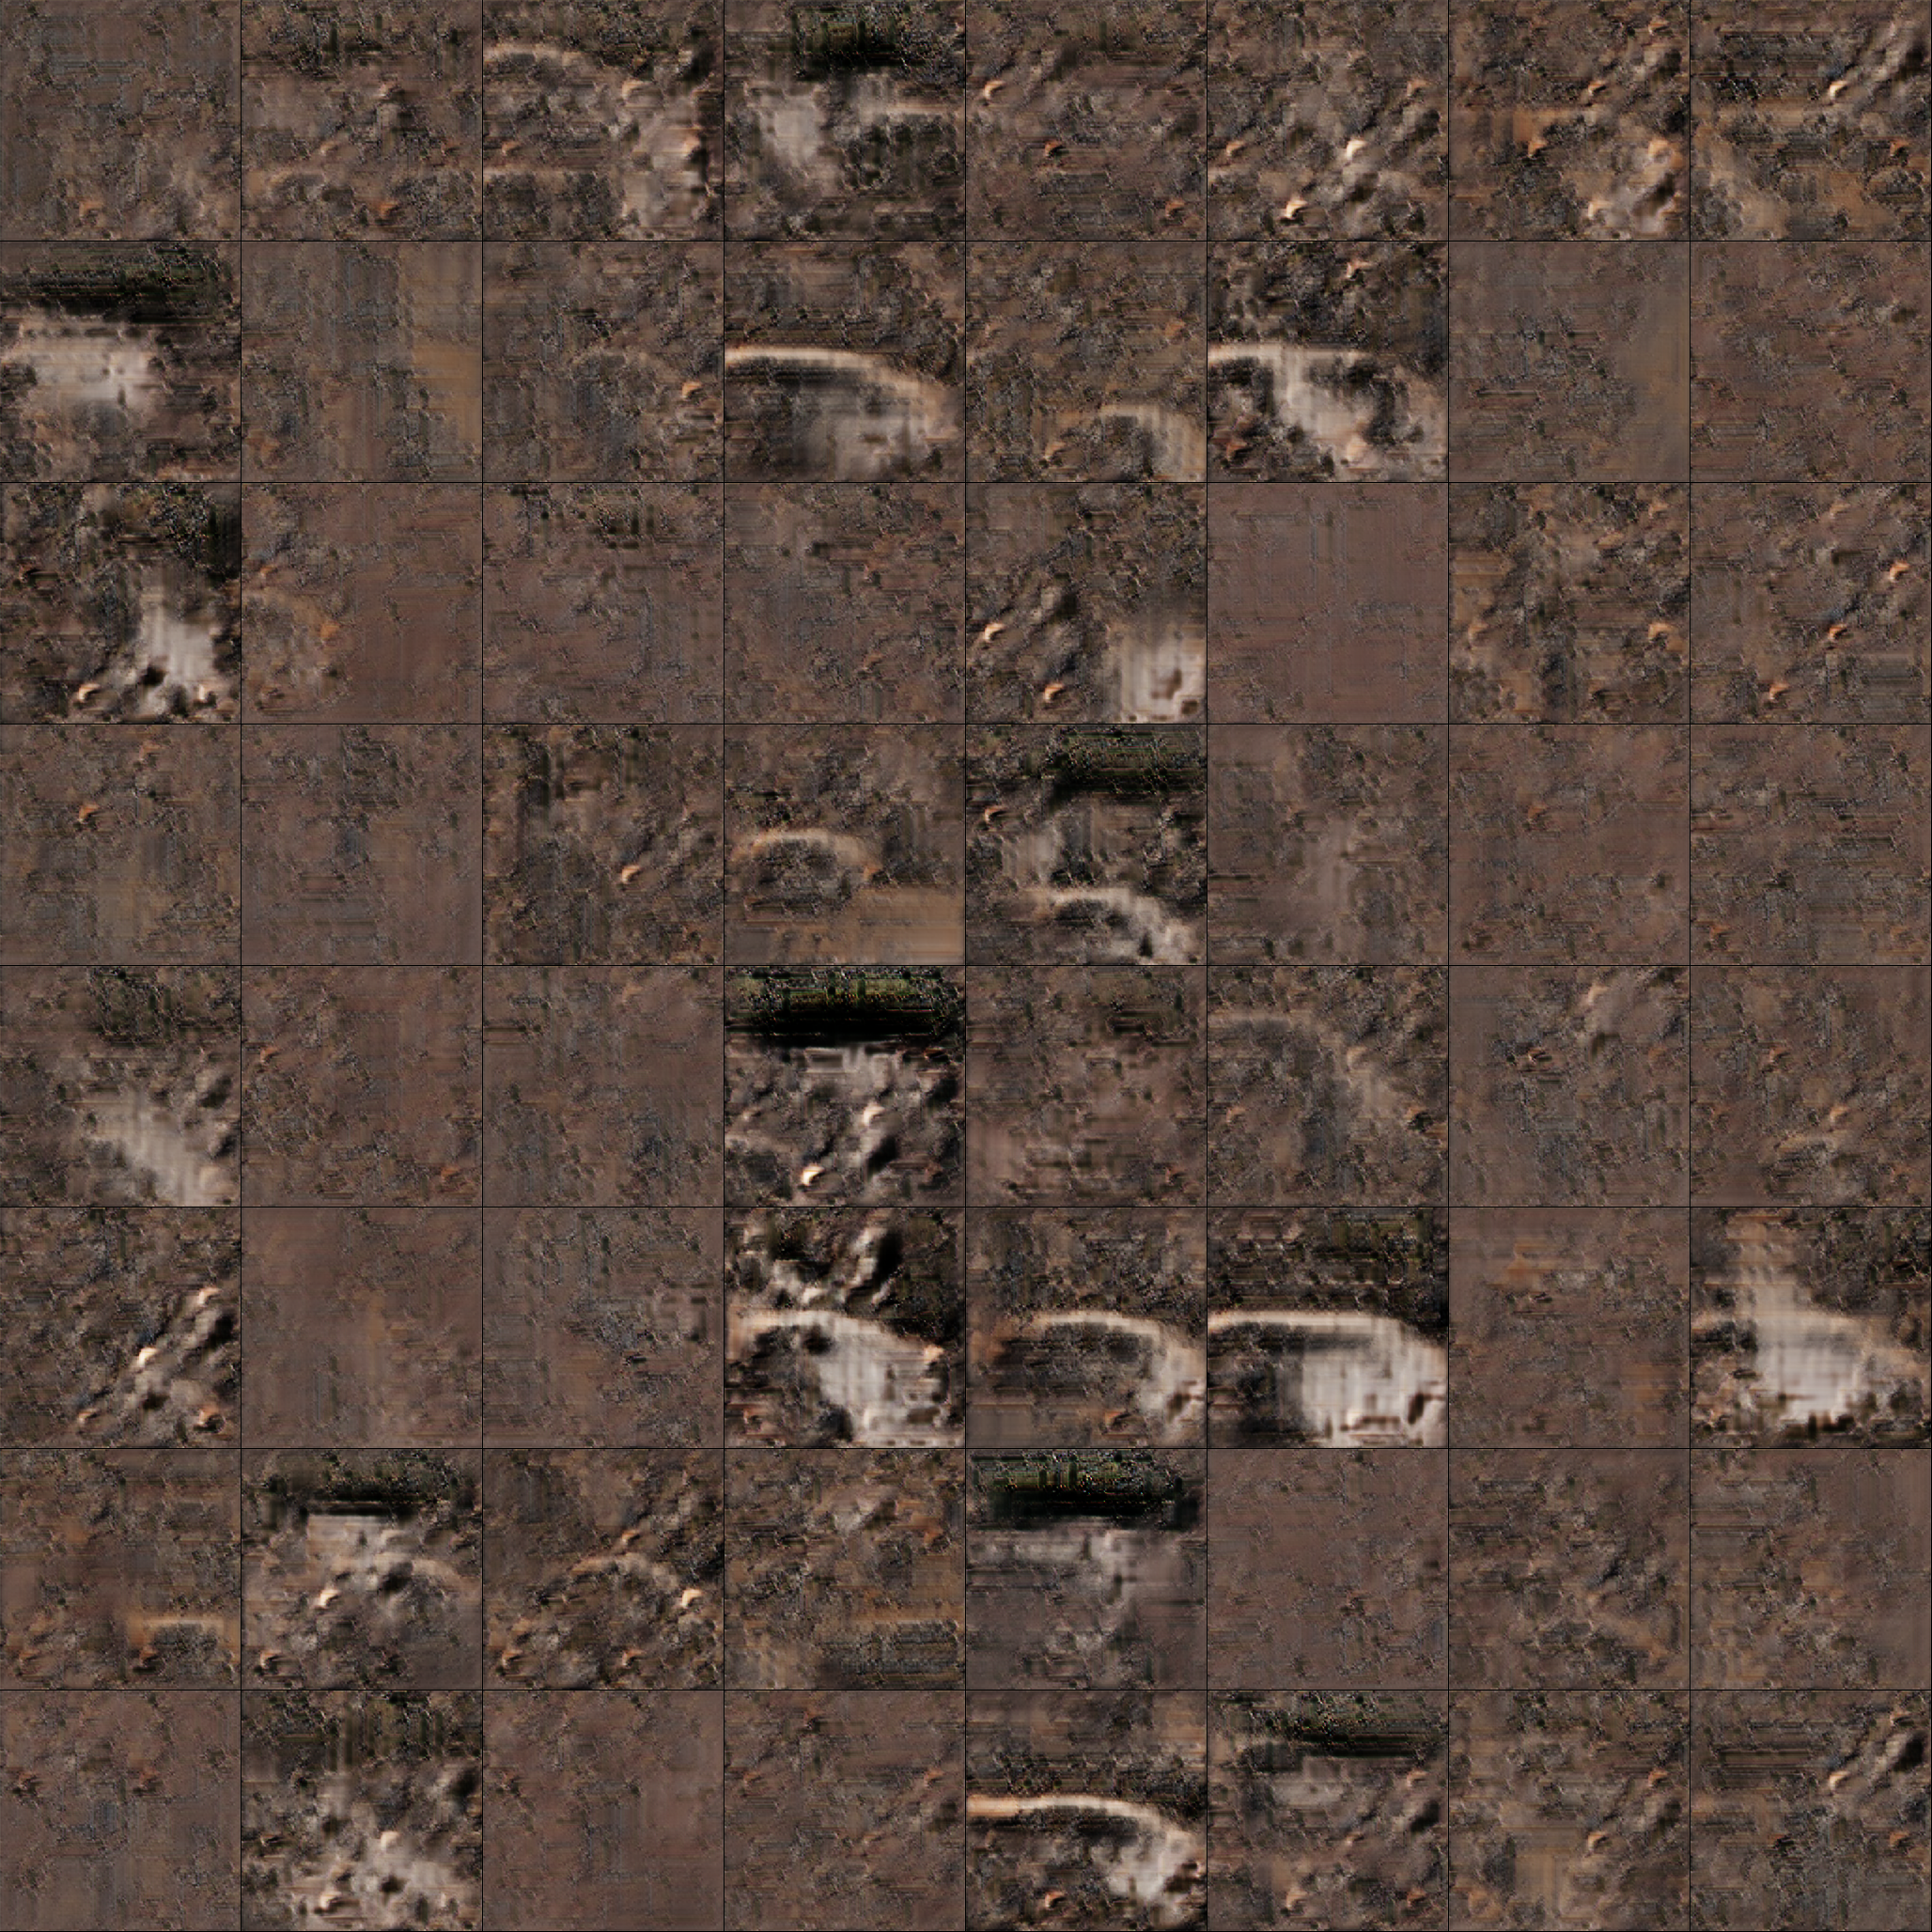

In [11]:
from IPython.display import Image,display
fname = './result/tmp/Image-Tile/000000.png'
display(Image(fname))